![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Análisis de sentimientos y técnicas de NLP

En este taller podrán poner en práctica sus conocimientos sobre las diferentes técnicas para el procesamiento de lenguaje natural. El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción sentimientos de viajeros en Twitter

En este taller se usará el conjunto de datos de sentimientos sobre distintas aerolíneas de EE.UU. provenientes de Twitter. Cada observación contiene si el sentimiento de los tweets es positivo, neutral o negativo teniendo en cuenta distintas variables como aerolínea y las razones de los sentimientos negativos (como "retraso en el vuelo" o "servicio grosero"). El objetivo es predecir el sentimiento asociado a cada tweet. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/crowdflower/twitter-airline-sentiment).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación de librerías
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
# Lectura de la información de archivo .zip
tweets = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/Tweets.zip', index_col=0)

# Visualización dataset
tweets.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
tweet_id,,,,,,,,,,,,,,
570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
# Impresión tamaño del cojunto de datos
tweets.shape

(14640, 14)

### Análisis descriptivo

In [5]:
# Cuenta de tweets por cada sentimiento
tweets['airline_sentiment'].value_counts()

airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64

In [6]:
# Cuenta de tweets por cada aerolínea
tweets['airline'].value_counts()

airline
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: count, dtype: int64

<Axes: title={'center': 'Sentiminetos por aerolínea'}, xlabel='airline'>

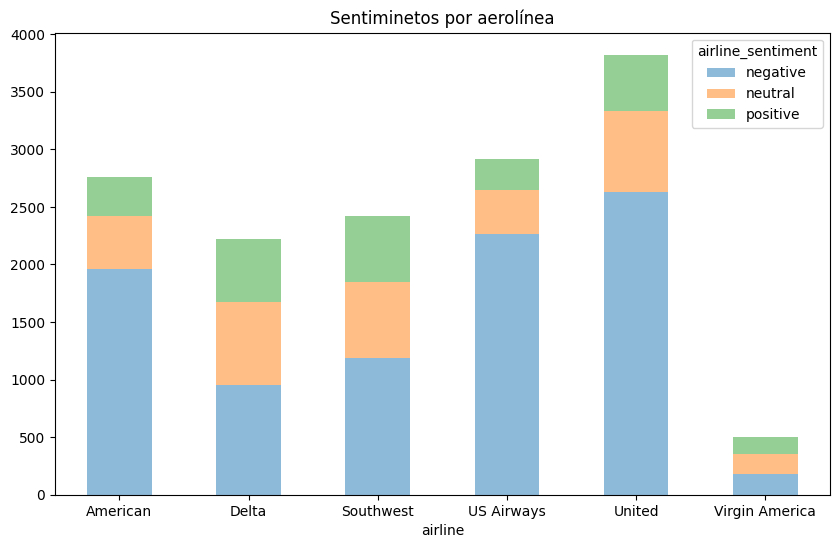

In [7]:
# Plot con cuenta de tweets por cada aerolínea y sentimiento
pd.crosstab(index = tweets["airline"],columns = tweets["airline_sentiment"]).plot(kind='bar',figsize=(10, 6),alpha=0.5,rot=0,stacked=True,title="Sentiminetos por aerolínea")

### Liberias y Variables de interés y predicción

In [8]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.metrics import accuracy_score

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [9]:
# Separación de variables predictoras (X) y de variable de interés (y)
X = tweets['text']
y = tweets['airline_sentiment'].map({'negative':-1,'neutral':0,'positive':1})

In [10]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=4)

### Punto 1 - Uso de CountVectorizer

En la celda 1 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [24]:
# Celda 1
vec_1 = CountVectorizer()
X_train_vec = vec_1.fit_transform(X_train)
X_test_vec = vec_1.transform(X_test)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_vec, y_train)
y_pred = rf_model.predict(X_test_vec)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy del modelo:", accuracy)

Accuracy del modelo: 0.7591059602649006


La precisión obtenida fue aproximadamente 0.759 (75.9%). Esto indica que el modelo pudo predecir correctamente el sentimiento de los tweets en alrededor del 75.9% de los casos en el conjunto de prueba.

### Punto 2 - Eliminación de Stopwords

En la celda 2 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer, **eliminen stopwords** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [25]:
# Celda 2
vec_2 = CountVectorizer(stop_words='english')
X_train_vec_2 = vec_2.fit_transform(X_train)
X_test_vec_2 = vec_2.transform(X_test)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_vec_2, y_train)
y_pred = rf_model.predict(X_test_vec_2)

accuracy_2 = accuracy_score(y_test, y_pred)
print("Accuracy del modelo con eliminación de stopwords:", accuracy_2)

Accuracy del modelo con eliminación de stopwords: 0.7466887417218543


La precisión reportada es de aproximadamente 0.746 (74.6%). Esto es ligeramente inferior al modelo base que no utilizaba la eliminación de stopwords y que obtuvo una precisión de aproximadamente 0.759 (75.9%).

La reducción en la precisión sugiere que la eliminación de stopwords puede haber eliminado algunas palabras que, aunque comúnmente no son informativas, en este contexto particular podrían haber tenido importancia para determinar el sentimiento.


### Punto 3 - Lematización con verbos

En la celda 3 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer, **lematizen el texto con verbos** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [26]:
# Celda 3
import nltk
nltk.download('punkt')
def lemmatize_text(text):

    # Tokenizar el texto en palabras
    words = nltk.word_tokenize(text)
    # Lematizar cada palabra en la lista de palabras
    lemmatized_words = [wordnet_lemmatizer.lemmatize(word, pos='v') for word in words]
    # Unir las palabras lematizadas en un solo texto
    lemmatized_text = " ".join(lemmatized_words)
    return lemmatized_text

# Lematizar cada texto en X_data
X_train_lemmatized = [lemmatize_text(text) for text in X_train]
X_test_lemmatized = [lemmatize_text(text) for text in X_test]

vec_1 = CountVectorizer()
X_train_vec_lemm = vec_1.fit_transform(X_train_lemmatized)
X_test_vec_lemm = vec_1.transform(X_test_lemmatized)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_vec_lemm, y_train)
y_pred = rf_model.predict(X_test_vec_lemm)
accuracy_3 = accuracy_score(y_test, y_pred)
print("Accuracy del modelo:", accuracy_3)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Accuracy del modelo: 0.7601407284768212


 El modelo logra una precisión de aproximadamente 0.760 (76.0%), lo que está ligeramente mejor en comparación con el modelo base (0.759) y el modelo con eliminación de stopwords (0.746).

 Aunque la mejora es mínima, es interesante notar que la lematización solo de verbos tiene un impacto positivo en comparación con la eliminación de stopwords, que redujo la precisión. Esto podría indicar que para este conjunto de datos específico y la tarea de análisis de sentimientos, conservar más información contextual (como stopwords) podría ser más beneficioso que eliminarla.

### Punto 4 - Multiples técnicas

En la celda 4 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer, eliminen stopwords, lematizen el texto con verbos** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [27]:
# Celda 4
def lemmatize_text(text):
    # Tokenizar el texto en palabras
    words = nltk.word_tokenize(text)
    # Lematizar cada palabra en la lista de palabras
    lemmatized_words = [wordnet_lemmatizer.lemmatize(word, pos='v') for word in words]
    # Unir las palabras lematizadas en un solo texto
    lemmatized_text = " ".join(lemmatized_words)
    return lemmatized_text

# Lematizar cada texto en X_data
X_train_4 = [lemmatize_text(text) for text in X_train]
X_test_4 = [lemmatize_text(text) for text in X_test]

vec_1 = CountVectorizer(stop_words='english')
X_train_vec_4 = vec_1.fit_transform(X_train_4)
X_test_vec_4 = vec_1.transform(X_test_4)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_vec_4, y_train)
y_pred = rf_model.predict(X_test_vec_4)
accuracy_4 = accuracy_score(y_test, y_pred)
print("Accuracy del modelo:", accuracy_4)

Accuracy del modelo: 0.7531043046357616


La precisión alcanzada es aproximadamente 0.753 (75.3%). Esto es comparable con las otras técnicas utilizadas en los puntos anteriores, donde la precisión varió ligeramente entre 0.746 y 0.760.
El modelo que combina lematización completa y eliminación de stopwords no muestra una mejora significativa en comparación con los modelos que usan solo una de estas técnicas. Esto podría indicar que, aunque cada técnica individualmente tiene sus beneficios, su combinación no necesariamente resulta en una mejora sustancial para este conjunto de datos.

### Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos (random forest) y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

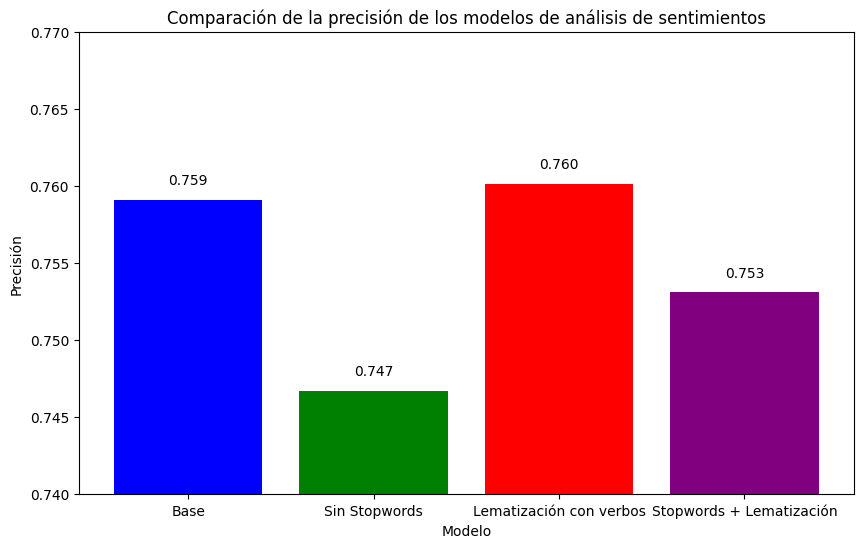

In [29]:
# Celda 5
import matplotlib.pyplot as plt


modelos = ['Base', 'Sin Stopwords', 'Lematización con verbos', 'Stopwords + Lematización']
precisiones = [accuracy, accuracy_2, accuracy_3, accuracy_4]

# Creando el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(modelos, precisiones, color=['blue', 'green', 'red', 'purple'])

plt.title('Comparación de la precisión de los modelos de análisis de sentimientos')
plt.xlabel('Modelo')
plt.ylabel('Precisión')
plt.ylim(0.74, 0.77)

for i in range(len(precisiones)):
    plt.text(i, precisiones[i] + 0.001, f'{precisiones[i]:.3f}', ha='center')

# Mostrar el gráfico
plt.show()


Consistencia en precisión: Todos los modelos presentaron exactitudes relativamente cercanas, variando entre 0.746 y 0.760. Esto sugiere que, para este conjunto de datos específico, las técnicas de preprocesamiento adicionales no ofrecen una mejora significativa en la capacidad del modelo para predecir el sentimiento.

Impacto de la eliminación de stopwords: Contrariamente a lo esperado, la eliminación de stopwords redujo ligeramente la precisión. Esto podría indicar que algunas stopwords podrían tener un papel más significativo en la connotación del sentimiento de los tweets.

Lematización: La lematización por sí sola mostró una leve mejora en la precisión en comparación con el modelo base. Esto puede ser porque normalizar las palabras a su raíz ayuda a reducir la dispersión de los datos y mejora la capacidad del modelo para generalizar a partir de términos similares.

En este caso, la lematización parece ser la técnica más prometedora si se elige una para mejorar el desempeño. Sin embargo, dado que la mejora es mínima, sería razonable explorar otras técnicas de preprocesamiento o incluso ajustar otros parámetros del modelo (como la profundidad del árbol en el RandomForest) para buscar mejoras significativas.